# Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

### Logistic Regression Assumptions

* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.


Keeping the above assumptions in mind, let’s look at our dataset.

### Data Exploration

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). The dataset can be downloaded from [here](https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv).



In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

In [2]:
data = pd.read_csv('bank.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


### Input variables

1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)

### Response variable

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

### Barplot for the dependent variable

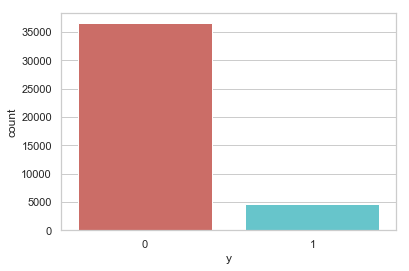

In [3]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

### Check the missing values

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Customer job distribution

In [6]:
sns.countplot(y="job", data=data)
plt.show()

### Customer marital status distribution

In [7]:
sns.countplot(x="marital", data=data)
plt.show()

### Barplot for credit in default

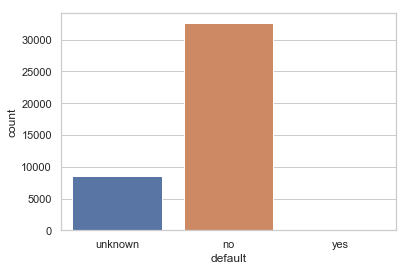

In [8]:
sns.countplot(x="default", data=data)
plt.show()

### Barplot for housing loan

In [9]:
sns.countplot(x="housing", data=data)
plt.show()

### Barplot for personal loan

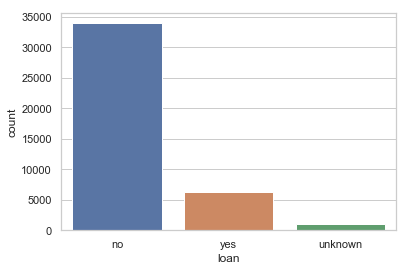

In [10]:
sns.countplot(x="loan", data=data)
plt.show()

### Barplot for previous marketing campaign outcome


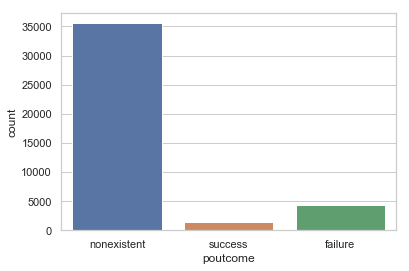

In [11]:
sns.countplot(x="poutcome", data=data)

Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. So, we will drop the variables that we do not need.

In [12]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

### Data Preprocessing

### Create dummy variables, that is variables with only two values, zero and one.

In logistic regression models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

In [17]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [14]:
data2

y  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0      0           0                1                 0              0   
1      0           0                0                 0              0   
2      1           0                0                 0              0   
3      0           0                0                 0              0   
4      1           0                0                 0              0   
5      0           0                0                 0              0   
6      0           0                1                 0              0   
7      0           0                1                 0              0   
8      1           1                0                 0              0   
9      0           0                1                 0              0   
10     0           0                0                 0              1   
11     0           0                0                 0              0   
12     1           0                0                 0              0   
13     0           0                0                 0              0   
14     0           1                0                 0              0   
15     0           0                0                 0              0   
16     1           0                0                 0              0   
17     1           1                0                 0              0   
18     0           0                1                 0              0   
19     0           0                0                 0              0   
20     0           0                0                 0              0   
21     0           0                1                 0              0   
22     0           1                0                 0              0   
23     0           0                0                 0              0   
24     0           0                1                 0              0   
25     0           0                0                 1              0   
26     0           0                0                 0              0   
27     0           1                0                 0              0   
28     0           0                1                 0              0   
29     0           0                1                 0              0   
...   ..         ...              ...               ...            ...   
41158  0           0                0                 0              0   
41159  0           1                0                 0              0   
41160  0           0                0                 0              0   
41161  0           0                1                 0              0   
41162  0           0                0                 0              0   
41163  0           0                1                 0              0   
41164  0           0                0                 0              0   
41165  0           1                0                 0              0   
41166  0           1                0                 0              0   
41167  0           1                0                 0              0   
41168  0           0                1                 0              0   
41169  0           0                0                 0              0   
41170  0           0                0                 0              0   
41171  0           1                0                 0              0   
41172  1           0                1                 0              0   
41173  0           0                0                 0              0   
41174  0           0                0                 1              0   
41175  0           0                1                 0              0   
41176  0           0                1                 0              0   
41177  0           0                0                 0              0   
41178  1           0                0                 0              0   
41179  0           0                0                 0              0   
41180  0   

### Drop the unknown columns

In [18]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

### Check the independence between the independent variables

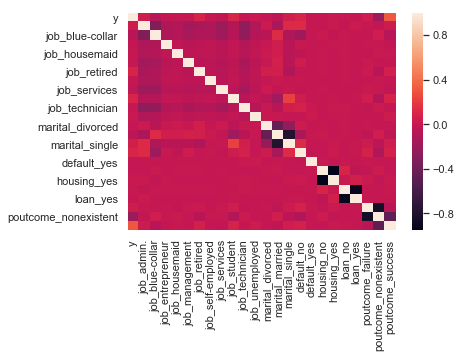

In [19]:
sns.heatmap(data2.corr())
plt.show()

### Split the data into training and test sets

In [20]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Check out training data is sufficient

In [21]:
X_train.shape

(30891, 23)

Great! Now we can start building our logistic regression model.

# Logistic Regression Model

### Fit logistic regression to the training set

In [23]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting the test set results and creating confusion matrix

The confusion_matrix() function will calculate a confusion matrix and return the result as an array.

In [24]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9046  110]
 [ 912  229]]


The result is telling us that we have 9046+229 correct predictions and 912+110 incorrect predictions.

### Accuracy

In [25]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Compute precision, recall, F-measure and support

To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      9156
          1       0.68      0.20      0.31      1141

avg / total       0.88      0.90      0.88     10297



### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer’s preferred term deposits that were promoted.